# Final exam code

The source code for resolving the exercises of the final exam for GRA4153 question 3

## Dependencies for the code
Feel free to colapse this header for clearity

For this code, the following libraries are necessary:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

The Classes necessary for this notebook are defined first, then the functions used, then the main body of the code is found futher below

### Classes

In [2]:
class Data:
    def __init__(self, target_CSV: str):
        '''
        Performs the necessary ETL and stages the data into a appropriate object
        '''
        self._raw_data = pd.read_csv(target_CSV)

        # Ensure observation_date is datetime
        self._raw_data['observation_date'] = pd.to_datetime(self._raw_data['observation_date'])
        self._raw_data.set_index('observation_date', inplace=True)
        self._sample = self._raw_data
        
    def set_sample_range(self, start_date: str, end_date: str):
        '''
        A setter method for the sample attribute that filters the raw data based on a date range.
        
        :param start_date: The start date for filtering
        :type start_date: str
        :param end_date: The end date for filtering
        :type end_date: str
        '''
        self._sample = self._raw_data.loc[start_date:end_date]
        
    @property
    def sample(self):
        return self._sample
    
    @sample.setter
    def sample(self, new_sample: pd.DataFrame):
        self._sample = new_sample

### Functions

In [3]:
def test_unit_root(df):
    '''
    Performs a unit test on a time series.
    
    :param df: DataFrame with time series data
    :type df: pd.DataFrame
    
    Prints:
    Test statistic, p-value, and conclusion about stationarity.
    '''
    # Run ADF test
    result = adfuller(df)

    # Unpack results
    test_statistic = result[0]
    p_value = result[1]
    used_lags = result[2]
    n_obs = result[3]
    critical_values = result[4]
    ic_best = result[5]

    # Print results
    print("ADF Test Statistic:", test_statistic)
    print("p-value:", p_value)
    print("Used Lags:", used_lags)
    print("Number of Observations:", n_obs)
    print("Critical Values:")
    for key, value in critical_values.items():
        print(f"   {key}: {value:.4f}")
    print("Information Criterion (best):", ic_best)

    # Conclusion
    if p_value < 0.05:
        print("\nConclusion: Reject the null hypothesis — the series is stationary.")
    else:
        print("\nConclusion: Fail to reject the null hypothesis — the series has a unit root (nonstationary).")

In [4]:
def plot_acf_pacf(df, lags=40):
    '''
    Plots ACF and PACF of the first-differenced INDPRO series.

    :param df: DataFrame with time series data
    :type df: pd.DataFrame
    :param lags: Number of lags to include in the plots
    :type lags: int
    :return: A plot with ACF and PACF together
    '''
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    plot_acf(df_diff['INDPRO'], lags=lags, ax=axes[0])
    axes[0].set_title('ACF of Differenced INDPRO')

    plot_pacf(df_diff['INDPRO'], lags=lags, ax=axes[1], method='ywm')
    axes[1].set_title('PACF of Differenced INDPRO')

    plt.tight_layout()
    

## Main code

### Q3.i
Selecting the correct sample for evaluating

In [5]:
indpro = Data("indpro.csv")
indpro.set_sample_range("1970-01-01", "2015-12-01")
indpro.sample.head(20)

,INDPRO
observation_date,
1970-01-01,37.9288
1970-02-01,37.9038
1970-03-01,37.8546
1970-04-01,37.7573
1970-05-01,37.7133
1970-06-01,37.5913
1970-07-01,37.6836
1970-08-01,37.6164
1970-09-01,37.3571


<Axes: title={'center': 'Time Series of INDPRO'}, xlabel='Date', ylabel='INDPRO'>

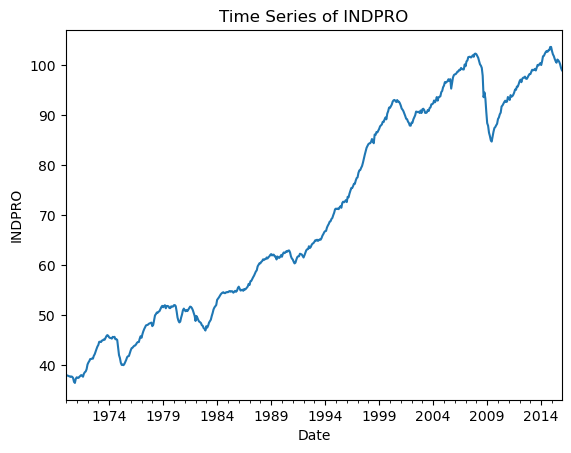

In [6]:
indpro.sample["INDPRO"].plot(title='Time Series of INDPRO', ylabel='INDPRO', xlabel='Date')

### Q3.ii
Testing for unit root of INDPRO data

In [7]:
test_unit_root(indpro.sample)

ADF Test Statistic: -1.0482117364544745
p-value: 0.7352768013756509
Used Lags: 4
Number of Observations: 547
Critical Values:
   1%: -3.4424
   5%: -2.8668
   10%: -2.5696
Information Criterion (best): 684.5104405539611

Conclusion: Fail to reject the null hypothesis — the series has a unit root (nonstationary).


### Q.iii
Correcting for the unit root

In [8]:
indpro.sample = indpro.sample.diff().dropna()
test_unit_root(indpro.sample)

ADF Test Statistic: -6.561947563095948
p-value: 8.338738663782002e-09
Used Lags: 3
Number of Observations: 547
Critical Values:
   1%: -3.4424
   5%: -2.8668
   10%: -2.5696
Information Criterion (best): 682.0742060108141

Conclusion: Reject the null hypothesis — the series is stationary.


### Q.iv
Ploting ACF and PACF

NameError: name 'plot_acf' is not defined

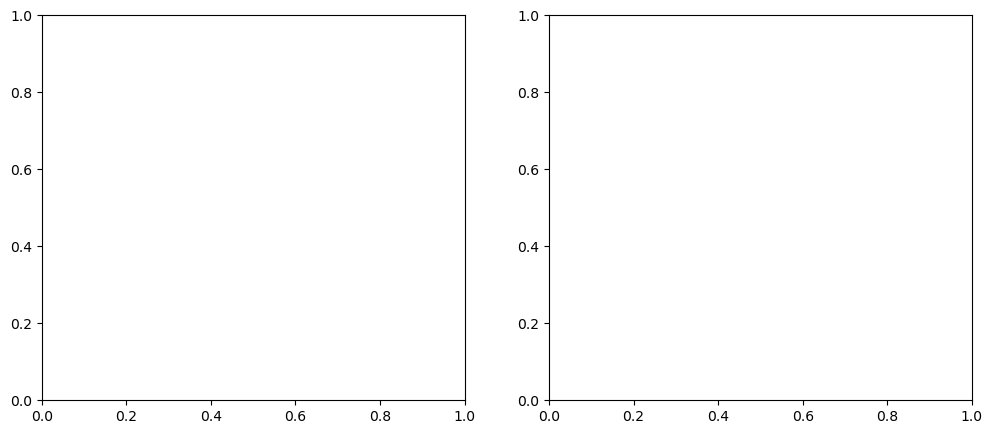

In [ ]:
plot_acf_pacf(indpro.sample)